In [21]:
# !python3 -m pip uninstall tensorflow tensorflow-probability nsc -y
# !python3 -m pip uninstall nsc -y

Found existing installation: nsc 0.0.1.5
Uninstalling nsc-0.0.1.5:
  Successfully uninstalled nsc-0.0.1.5


In [22]:
# !python3 -m pip install tensorflow tensorflow-probability -q
!python3 -m pip install -i https://test.pypi.org/simple/ nsc -q

Plotting the coupled functions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set()
from collections import defaultdict
import ipdb

# From nsc lib
from nsc.util.function import coupled_logarithm, coupled_exponential


Importing NSC v0.0.1.5.


In [3]:
from distribution_old import CoupledNormal

#### CoupledLogarithm

In [5]:
# 100 linearly spaced numbers, starting from CLOSE to 0
X = np.linspace(1e-6, 5, 1000)

In [6]:
X

array([1.00000000e-06, 5.00600400e-03, 1.00110080e-02, 1.50160120e-02,
       2.00210160e-02, 2.50260200e-02, 3.00310240e-02, 3.50360280e-02,
       4.00410320e-02, 4.50460360e-02, 5.00510400e-02, 5.50560440e-02,
       6.00610480e-02, 6.50660521e-02, 7.00710561e-02, 7.50760601e-02,
       8.00810641e-02, 8.50860681e-02, 9.00910721e-02, 9.50960761e-02,
       1.00101080e-01, 1.05106084e-01, 1.10111088e-01, 1.15116092e-01,
       1.20121096e-01, 1.25126100e-01, 1.30131104e-01, 1.35136108e-01,
       1.40141112e-01, 1.45146116e-01, 1.50151120e-01, 1.55156124e-01,
       1.60161128e-01, 1.65166132e-01, 1.70171136e-01, 1.75176140e-01,
       1.80181144e-01, 1.85186148e-01, 1.90191152e-01, 1.95196156e-01,
       2.00201160e-01, 2.05206164e-01, 2.10211168e-01, 2.15216172e-01,
       2.20221176e-01, 2.25226180e-01, 2.30231184e-01, 2.35236188e-01,
       2.40241192e-01, 2.45246196e-01, 2.50251200e-01, 2.55256204e-01,
       2.60261208e-01, 2.65266212e-01, 2.70271216e-01, 2.75276220e-01,
      

In [7]:
y = {}

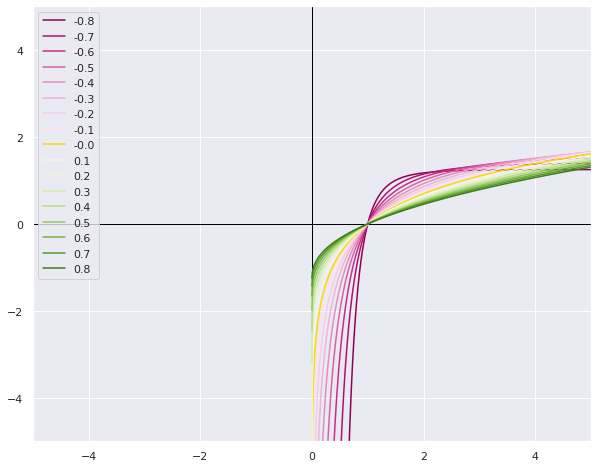

In [13]:
# plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(10, 8))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
kappa_values = [round(value, 1) for value in np.arange(-0.8, 0.9, 0.1)]
n = len(kappa_values)
ax.set_prop_cycle(color=['gold' if kappa==0 else cm(1.*i/n) for i, kappa in enumerate(kappa_values)])

plt.xlim(-5, 5)
plt.ylim(-5, 5)

for kappa in kappa_values:
    y[kappa] = coupled_logarithm(X, kappa)
#     for x in X:
#         y[kappa].append(CoupledLogarithm(x, kappa))
    plt.plot(X, y[kappa], label=kappa)

plt.legend()
plt.show();

#### CoupledExponential

In [18]:
# 100 linearly spaced numbers, starting from CLOSE to 0
X = np.linspace(-5, 5, 1000)

In [19]:
y = defaultdict(list)

/home/kevin/anaconda3/envs/test/lib/python3.7/site-packages/nsc/util/function.py:101: RuntimeWarning: divide by zero encountered in double_scalars
  coupled_exp_value = (1 + kappa*value)**(1/(kappa / (1 + dim*kappa))) # removed negative sign and added reciprocal
/home/kevin/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/home/kevin/anaconda3/envs/test/lib/python3.7/site-packages/nsc/util/function.py:98: RuntimeWarning: invalid value encountered in double_scalars
  coupled_exp_value = (1 + kappa*value)**(1/(kappa / (1 + dim*kappa))) # removed negative sign and added reciprocal
/home/kevin/anaconda3/envs/test/lib/python3.7/site-packages/nsc/util/function.py:98: RuntimeWarning: invalid value encountered in double_scalars
  coupled_exp_value = (1 + kappa*value)**(1/(kappa / (1 + dim*kappa))) # removed negative sign and added reciprocal


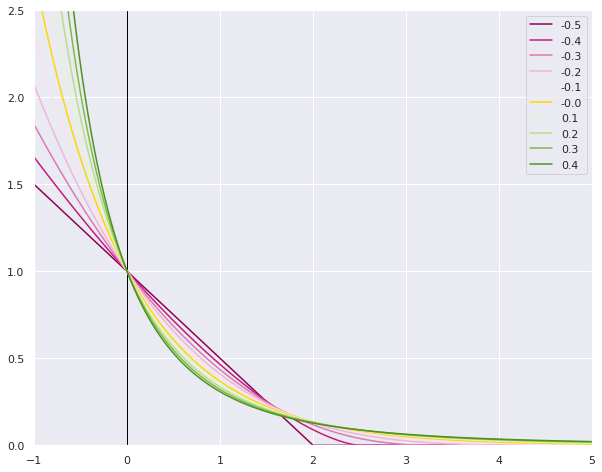

In [20]:
# plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(10, 8))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
kappa_values = [round(value, 1) for value in np.arange(-0.5, 0.5, 0.1)]
n = len(kappa_values)
ax.set_prop_cycle(color=['gold' if kappa==0 else cm(1.*i/n) for i, kappa in enumerate(kappa_values)])

plt.xlim(-1, 5)
plt.ylim(0, 2.5)

for kappa in kappa_values:
    for x in X:
        result = coupled_exponential(x, kappa)
        y[kappa].append(1/result)
    #print(y[kappa])
    plt.plot(X, y[kappa], label=kappa)

plt.legend()
plt.show();